# 다중회귀
    - feature engineering(PolynomialFeatures)
    - 규제(릿지 회귀, 라쏘 회귀)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://bit.ly/perch_csv')

In [3]:
# 다운받은 데이터프레임 넘파이 배열로 변환
# perch_full은 길이, 높이, 넓이가 저장되어있다. 
perch_full = df.to_numpy() 

In [5]:
import numpy as np

In [7]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ) 

In [11]:
from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(perch_full,perch_weight,random_state=42)      

## Feature engineering

In [13]:
#모델에 필요한 새로운 특성 만들기 - 다항식을 구성할 때
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures()

In [16]:
#poly를 사용할 때 fit - transform 과정이 꼭 필요하다. 
poly.fit([[2,3]])

PolynomialFeatures()

In [17]:
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [18]:
# includ_bias = False를 통해 필요없는 1 제거
poly = PolynomialFeatures(include_bias=False)

In [19]:
poly.fit(train_input)

PolynomialFeatures(include_bias=False)

In [20]:
train_poly = poly.transform(train_input)

In [21]:
print(train_poly.shape)

(42, 9)


* 특성이 9개로 늘어난 것을 볼 수 있다. 

In [22]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [24]:
# test set의 특성도 늘려주어야 한다. 
test_poly = poly.transform(test_input)

In [25]:
from  sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(train_poly, train_target)

LinearRegression()

In [28]:
#훈련세트 결정계수 확인
print(lr.score(train_poly, train_target))

0.9903183436982125


In [29]:
#테스트 세트 결정계수 확인
print(lr.score(test_poly,test_target))

0.9714559911594155


* 앞서 보였던 과소적합 문제가 보이지 않는다.

In [30]:
# 특성을 더 많이 추가하기 위해 5제곱 특성까지 만들어 출력해보자
poly = PolynomialFeatures(degree = 5, include_bias = False)

In [31]:
poly.fit(train_input)

PolynomialFeatures(degree=5, include_bias=False)

In [32]:
train_poly = poly.transform(train_input)

In [33]:
test_poly = poly.transform(test_input)

In [70]:
print(train_poly.shape)

(42, 55)


* 55개의 특성이 만들어 졌다. 

In [35]:
lr.fit(train_poly,train_target)

LinearRegression()

In [36]:
print(lr.score(train_poly, train_target))

0.9999999999938143


In [37]:
print(lr.score(test_poly,test_target))

-144.40744532797535


* 특성의 개수를 늘리면 선형 모델은 아주 강력해진다. 따라서 훈련 세트에 대해 거의 완벽하게 학습할 수 있습니다. 하지만
그렇게 되면 훈련 세트에 너무 과대적합되므로 테스트 세트에서는 형편없는 점수를 얻게 됩니다. 

In [41]:
# 데이터 전처리인 Scaling 하기
from sklearn.preprocessing import StandardScaler

In [42]:
ss = StandardScaler() # 표준화 메서드이다. 

In [43]:
ss.fit(train_poly)

StandardScaler()

In [44]:
train_scaled = ss.transform(train_poly)

In [45]:
test_scaled = ss.transform(test_poly)

## 릿지 회귀

In [46]:
from sklearn.linear_model import Ridge

In [47]:
ridge = Ridge()

In [48]:
ridge.fit(train_scaled,train_target)

Ridge()

In [50]:
print(ridge.score(train_scaled,train_target))

0.9896101671037343


In [51]:
print(ridge.score(test_scaled,test_target))

0.9790693977615386


In [54]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [55]:
# 릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다. 
# 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절합니다. 
# alpha 값이 크면 규제 up, alpha 값이 작으면 규제 down -> 적절한 규제 강도를 찾아 과대 적합, 과소적합을 줄이자.
alpha_list = [0.001,0.01, 0.1,1,10,100]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled,test_target))
    

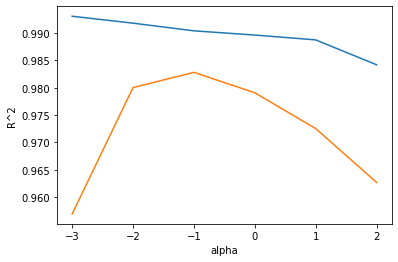

In [57]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

* 파란색 줄은 훈련세트 그래프, 노란 줄은 테스트 세트 그래프이다. 따라서 -1(alpha = 0.1)일때가 가장 정확한 모델을 만들 수 있다. 

In [58]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570368
0.9827976465386896


## 라쏘 회귀

In [59]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)

Lasso()

In [60]:
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled,test_target))

0.989789897208096
0.9800593698421884


In [67]:
train_score = []
test_score = []

alpha_list = [0.001,0.01, 0.1,1,10,100]
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, train_target)
    
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled,test_target))

C:\Users\LG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939724, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\LG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475362, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\LG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926335934, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


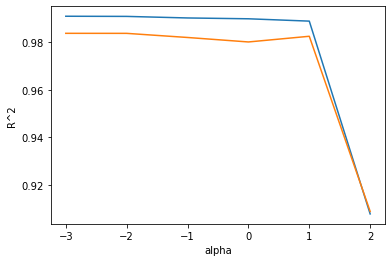

In [66]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

* 파란색 줄은 훈련세트 그래프, 노란 줄은 테스트 세트 그래프이다. 따라서 1(alpha = 10)일때가 가장 정확한 모델을 만들 수 있다.

In [68]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled,test_target))

0.9888067471131867
0.9824470598706695


In [69]:
print(np.sum(lasso.coef_ == 0))

40
